In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [5]:
dataset = 'moons'

In [6]:
from sklearn.datasets import make_moons

In [7]:
X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)
X_train_flat = X_train

In [8]:
X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)
X_test_flat = X_test

In [9]:
X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

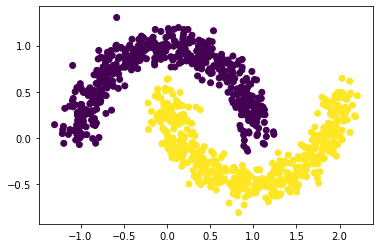

In [10]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### Create model and train

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
z = pca.fit_transform(X_train_flat)

### plot output

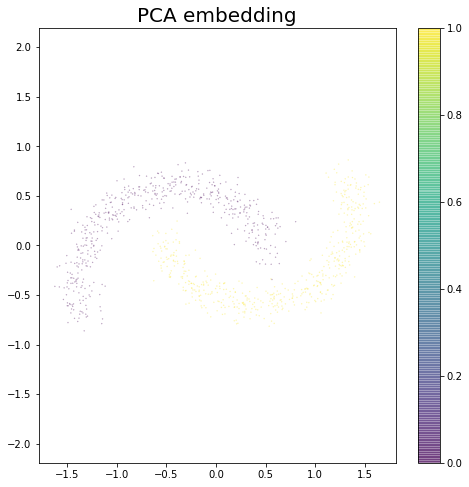

In [14]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train,
    #cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save model

In [15]:
import os
import pickle

In [16]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [17]:
output_dir = MODEL_DIR/'projections'/ dataset / 'PCA'
ensure_dir(output_dir)

In [18]:
with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

In [19]:
np.save(output_dir / 'z.npy', z)

## tsne

In [33]:
from openTSNE import TSNE

In [28]:
tsne = TSNE(
    n_components = 2,
    perplexity = 500
)

In [29]:
embedding_train = tsne.fit(X_train_flat)

In [30]:
z = np.array(embedding_train)

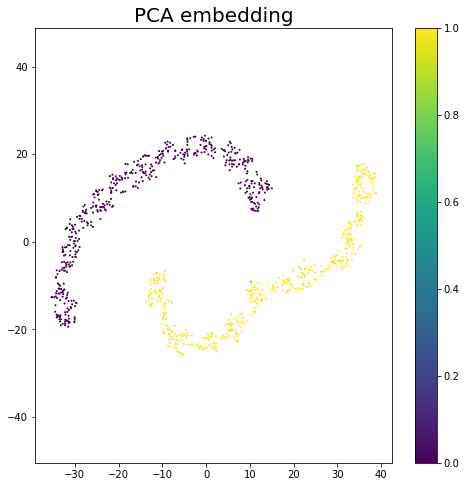

In [31]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train,
    #cmap="tab10",
    s=1,
    alpha=1,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("tsne embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

#### save model

In [32]:
import os
import pickle

from tfumap.paths import ensure_dir, MODEL_DIR

output_dir = MODEL_DIR/'projections'/ dataset /  'TSNE'
ensure_dir(output_dir)

with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

np.save(output_dir / 'z.npy', z)